In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset
df = pd.read_csv("zomato.csv")

In [23]:
# Step 1: Inspect the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (51717, 17)


In [24]:
print("Columns:\n", df.columns)

Columns:
 Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [25]:
print("\nBasic Info:\n")
print(df.info())


Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list     

In [26]:
print("\nFirst Few Rows:\n", df.head())


First Few Rows:
                                                  url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes  

In [27]:
# Dropping unnecessary columns
df.drop(["name","url","address","phone","dish_liked","reviews_list","menu_item","listed_in(city)","location"],axis=1,inplace=True)

In [28]:
# Step 2: Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 online_order                      0
book_table                        0
rate                           7775
votes                             0
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
dtype: int64


In [29]:
# Drop rows with missing values
df=df.dropna()

In [30]:
# Step 3: Data Preprocessing
# Convert 'rate' column to numeric by removing '/5' and handling inconsistent data

## Replace 'NEW' and '-' with NaN
df['rate'] = df['rate'].replace(['NEW', '-'], np.nan)

## Remove '/5' and convert to float
df['rate'] = df['rate'].str.replace('/5', '', regex=False).astype(float)

## Calculate the median of the column (ignoring NaN)
rate_median = df['rate'].median()

## Replace NaN values with the median
df['rate']=df['rate'].fillna(rate_median)

print(df['rate'].isnull().sum())

0


In [31]:
df["cuisines_list"] = df["cuisines"].str.split(",").apply(lambda x: [c.strip() for c in x])
df = df.explode("cuisines_list")
df = df.drop(columns=["cuisines"])
df = df.rename(columns={"cuisines_list": "cuisine"})

# Remove duplicates
df = df.drop_duplicates()

# Count the occurrence of each cuisine
cuisine_counts = df["cuisine"].value_counts()

# Replace cuisines with less than 100 occurrences with "Others"
df["cuisine"] = df["cuisine"].apply(lambda x: x if cuisine_counts[x] >= 100 else "Others")

In [32]:
df["cuisine"].value_counts()

cuisine
North Indian     10976
Chinese           8104
Continental       3970
Fast Food         3864
South Indian      3858
Cafe              3350
Biryani           3298
Desserts          3033
Beverages         2534
Italian           2308
Others            1650
Street Food       1438
Pizza             1437
Burger            1384
Bakery            1257
Seafood           1172
Andhra            1089
American          1045
Mughlai            992
Ice Cream          973
Asian              971
Finger Food        906
Salad              832
Momos              769
Rolls              737
Kerala             732
Thai               719
Arabian            591
BBQ                561
European           557
Kebab              537
Healthy Food       509
Juices             497
Mithai             497
Sandwich           493
Mediterranean      439
Steak              425
Mangalorean        390
Mexican            356
Bengali            346
Japanese           284
Tea                192
Hyderabadi         181
Tib

In [33]:
# Normalize the 'cost' column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

In [34]:
# Renaming columns for better readability
df.rename(columns={'approx_cost(for two people)': 'cost', 'listed_in(type)': 'type'}, inplace=True)

In [35]:
# Step 4: Exploratory Data Analysis
print("\nCleaned Dataset Shape:", df.shape)
print("\nBasic Statistics:\n", df.describe())


Cleaned Dataset Shape: (71059, 8)

Basic Statistics:
                rate         votes          cost
count  71059.000000  71059.000000  71059.000000
mean       3.812647    581.534274    714.887291
std        0.453525   1213.040534    492.617646
min        1.800000      0.000000     40.000000
25%        3.600000     36.000000    400.000000
50%        3.900000    150.000000    600.000000
75%        4.100000    563.000000    900.000000
max        4.900000  16832.000000   6000.000000


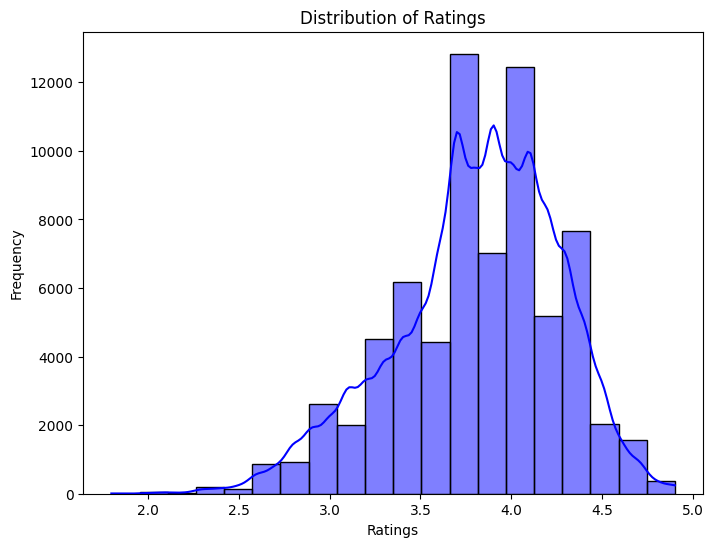

In [36]:
# Visualizations
# 1. Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['rate'], bins=20, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14116\1933333716.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='type', order=df['type'].value_counts().index, palette='viridis')


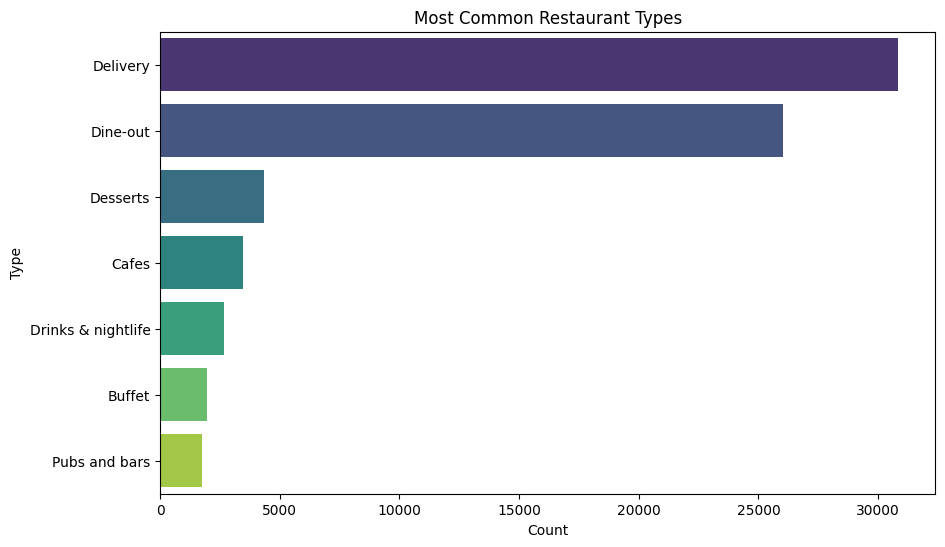

In [37]:
# 2. Most Common Restaurant Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='type', order=df['type'].value_counts().index, palette='viridis')
plt.title('Most Common Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

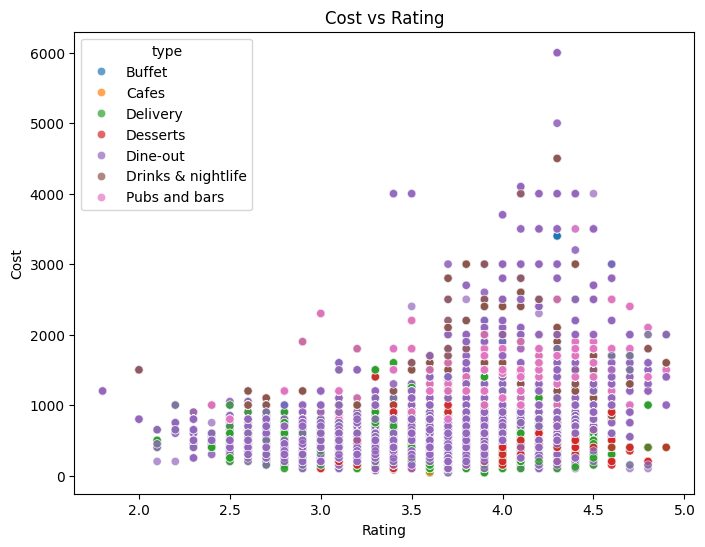

In [38]:
# 3. Cost vs Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rate', y='cost', hue='type', alpha=0.7)
plt.title('Cost vs Rating')
plt.xlabel('Rating')
plt.ylabel('Cost')
plt.show()

In [39]:
# Save the DataFrame to a CSV file
df.to_csv('restaurant_data.csv', index=False)